<a href="https://colab.research.google.com/github/aumair472/machine_learning_session_1/blob/main/machine_learning_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load the Data

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/DataSet/Student_Performance.csv')

print('Print First Five Row of the Data Set: \n')
print(df.head())

Print First Five Row of the Data Set: 

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [ ]:
dependent_variable = ' Performance Index'

independent_variables = [col for col in df.columns if col != dependent_variable]

print('Dependent Variable: \n', dependent_variable)
print('Independent Variables: \n', independent_variables)

print('\n Missing values in the dataset:')
print(df.isnull().sum())



Dependent Variable: 
  Performance Index
Independent Variables: 
 ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']

 Missing values in the dataset:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [ ]:
print("Original DataFrame columns:", df.columns)
print("Data types before encoding:\n", df.dtypes)

# Identify categorical columns for one-hot encoding
categorical_cols = df.select_dtypes(include=['object']).columns

if len(categorical_cols) > 0:
    print(f"\nCategorical columns to encode: {list(categorical_cols)}")
    # Apply one-hot encoding
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    print("\nDataFrame after one-hot encoding and dropping original categorical columns:")
    print(df_encoded.head())
    df = df_encoded
else:
    print("\nNo categorical columns found for encoding.")

print("\nData types after encoding:\n", df.dtypes)

Original DataFrame columns: Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')
Data types before encoding:
 Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

Categorical columns to encode: ['Extracurricular Activities']

DataFrame after one-hot encoding and dropping original categorical columns:
   Hours Studied  Previous Scores  Sleep Hours  \
0              7               99            9   
1              4               82            4   
2              8               51            7   
3              5               52            5   
4              7               75            8   

   Sample Question Papers Practiced  Performance 

In [ ]:
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 1. Separate features (X) and target (y)
y = df['Performance Index']
X = df.drop('Performance Index', axis=1)

print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# 3. Check for multicollinearity using VIF
# Ensure all boolean columns are converted to int for VIF calculation
X_vif = X.copy()
for col in X_vif.select_dtypes(include='bool').columns:
    X_vif[col] = X_vif[col].astype(int)

X_vif_const = add_constant(X_vif)

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif_const.values, i) for i in range(X_vif_const.shape[1])]

# Drop the constant row as it's not a feature
vif_data = vif_data.drop(vif_data[vif_data['feature'] == 'const'].index)

print("\nVariance Inflation Factor (VIF) for independent variables:")
print(vif_data.sort_values(by='VIF', ascending=False))

# 4. Confirm data types
print("\nData types of features (X) after preprocessing:")
print(X.dtypes)
print("\nData type of target (y):")
print(y.dtypes)

Shape of X (features): (10000, 5)
Shape of y (target): (10000,)

Training set size: 8000 samples
Testing set size: 2000 samples

Variance Inflation Factor (VIF) for independent variables:
                            feature       VIF
5    Extracurricular Activities_Yes  1.000802
3                       Sleep Hours  1.000600
4  Sample Question Papers Practiced  1.000557
1                     Hours Studied  1.000478
2                   Previous Scores  1.000326

Data types of features (X) after preprocessing:
Hours Studied                       int64
Previous Scores                     int64
Sleep Hours                         int64
Sample Question Papers Practiced    int64
Extracurricular Activities_Yes       bool
dtype: object

Data type of target (y):
float64


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

print("Multiple Linear Regression model trained successfully.")

Multiple Linear Regression model trained successfully.


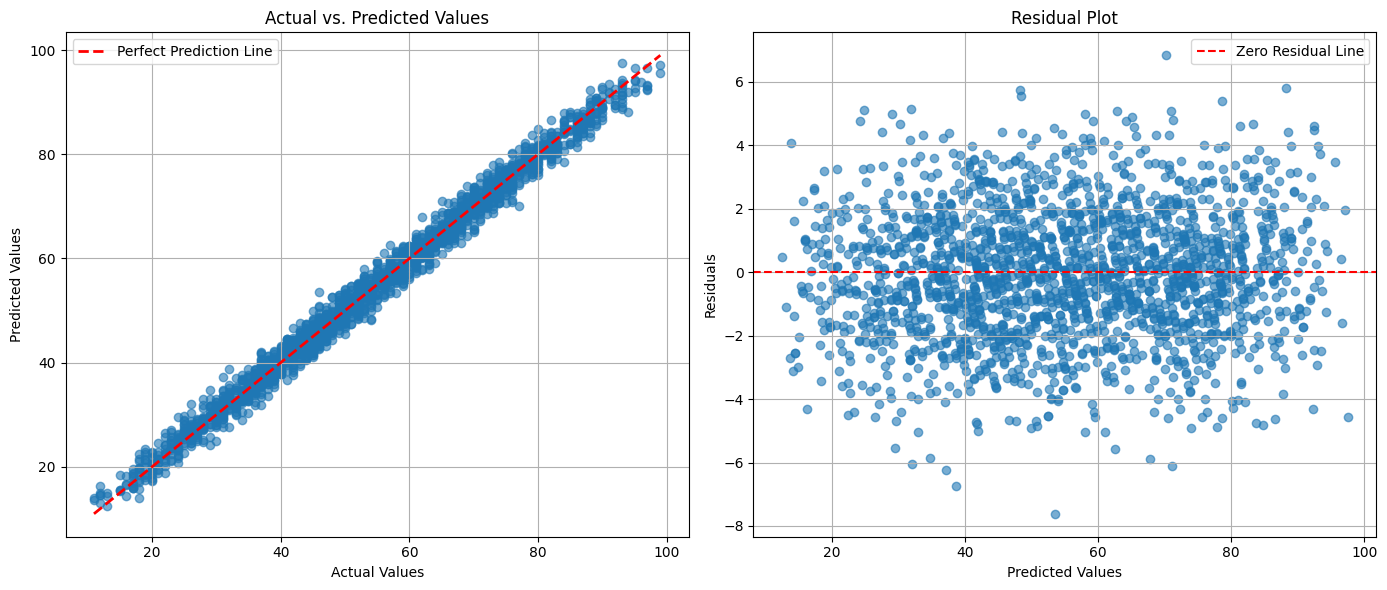

In [ ]:
import matplotlib.pyplot as plt

# 1. Make predictions on the test set
y_pred = model.predict(X_test)

# 2. Calculate the residuals
residuals = y_test - y_pred

# Set a larger figure size for better visualization
plt.figure(figsize=(14, 6))

# 3. Create a scatter plot of Actual vs. Predicted Values
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.legend()

# 4. Create a residual plot
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residual Line')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# 1. Print the intercept
print(f"Model Intercept: {model.intercept_:.2f}")

# 2. Print the coefficients
coefficients_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})

print("\nModel Coefficients:")
print(coefficients_df)



Model Intercept: -33.92

Model Coefficients:
                            Feature  Coefficient
0                     Hours Studied     2.852484
1                   Previous Scores     1.016988
2                       Sleep Hours     0.476941
3  Sample Question Papers Practiced     0.191831
4    Extracurricular Activities_Yes     0.608617


In [ ]:
# Make predictions on the test set (already done in previous step, reusing y_pred)
# y_pred = model.predict(X_test)

# 4. Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# 5. Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# 6. Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# 7. Print all calculated evaluation metrics
print("\nModel Evaluation Metrics:")
print(f"R-squared: {r_squared:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Model Evaluation Metrics:
R-squared: 0.9890
Mean Absolute Error (MAE): 1.61
Root Mean Squared Error (RMSE): 2.02


#Predict the performance for a new student based on the trained model.

In [ ]:
new_student = pd.DataFrame({
    "Hours Studied": [6],
    "Previous Scores": [80],
    "Extracurricular Activities": ["Yes"],
    "Sleep Hours": [7],
    "Sample Question Papers Practiced": [3]
})

# Apply same encoding as training data
new_student_encoded = pd.get_dummies(new_student, drop_first=True)

# Make sure columns align with training data
new_student_encoded = new_student_encoded.reindex(columns=X.columns, fill_value=0)

predicted_score = model.predict(new_student_encoded)
print("Predicted Performance Index:", predicted_score[0])


Predicted Performance Index: 68.46609799309917


In [14]:
from sklearn.tree import DecisionTreeRegressor

# 1. Instantiate a DecisionTreeRegressor model
model_dt = DecisionTreeRegressor(random_state=42) # Using random_state for reproducibility

# 2. Train the model using the preprocessed X_train and y_train
model_dt.fit(X_train, y_train)

# 3. Make predictions on the preprocessed X_test and store them in y_pred_dt
y_pred_dt = model_dt.predict(X_test)

print("Decision Tree Regressor model trained successfully.")
print("Predictions made on the test data.")
print(f"First 5 predictions: {y_pred_dt[:5]}")

Decision Tree Regressor model trained successfully.
Predictions made on the test data.
First 5 predictions: [57. 24. 45. 27. 45.]


In [15]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Calculate R-squared
r2_dt = r2_score(y_test, y_pred_dt)

# Calculate Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Print the results
print(f"Decision Tree Regressor Model Performance:")
print(f"R-squared: {r2_dt:.4f}")
print(f"Mean Absolute Error (MAE): {mae_dt:.4f}")
print(f"Mean Squared Error (MSE): {mse_dt:.4f}")

Decision Tree Regressor Model Performance:
R-squared: 0.9762
Mean Absolute Error (MAE): 2.3391
Mean Squared Error (MSE): 8.8146


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the parameter grid for Decision Tree Regressor
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params_dt = grid_search.best_params_
best_estimator_dt = grid_search.best_estimator_

# Make predictions using the best estimator
y_pred_dt_tuned = best_estimator_dt.predict(X_test)

print(f"Hyperparameter tuning complete. Best parameters: {best_params_dt}")
print("Hyperparameter-tuned Decision Tree Regressor trained successfully.")
print("Predictions made on the test data.")
print(f"First 5 predictions: {y_pred_dt_tuned[:5]}")

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Hyperparameter tuning complete. Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Hyperparameter-tuned Decision Tree Regressor trained successfully.
Predictions made on the test data.
First 5 predictions: [56.5        23.25       48.11111111 27.33333333 43.5       ]


In [17]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Calculate R-squared
r2_dt_tuned = r2_score(y_test, y_pred_dt_tuned)

# Calculate Mean Absolute Error (MAE)
mae_dt_tuned = mean_absolute_error(y_test, y_pred_dt_tuned)

# Calculate Mean Squared Error (MSE)
mse_dt_tuned = mean_squared_error(y_test, y_pred_dt_tuned)

# Print the results
print(f"Hyperparameter-tuned Decision Tree Regressor Model Performance:")
print(f"R-squared: {r2_dt_tuned:.4f}")
print(f"Mean Absolute Error (MAE): {mae_dt_tuned:.4f}")
print(f"Mean Squared Error (MSE): {mse_dt_tuned:.4f}")

Hyperparameter-tuned Decision Tree Regressor Model Performance:
R-squared: 0.9843
Mean Absolute Error (MAE): 1.9046
Mean Squared Error (MSE): 5.8304


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary to store the metrics for each model
performance_data = {
    'Model': ['Multiple Linear Regression', 'Decision Tree Regressor', 'Tuned Decision Tree Regressor'],
    'R-squared': [r_squared, r2_dt, r2_dt_tuned],
    'MAE': [mae, mae_dt, mae_dt_tuned],
    'MSE': [mse, mse_dt, mse_dt_tuned]
}

# Create a DataFrame from the performance data
performance_df = pd.DataFrame(performance_data)

print("Performance Metrics for all models:")
print(performance_df)


Performance Metrics for all models:
                           Model  R-squared       MAE       MSE
0     Multiple Linear Regression   0.988983  1.611121  4.082628
1        Decision Tree Regressor   0.976214  2.339083  8.814569
2  Tuned Decision Tree Regressor   0.984267  1.904565  5.830447


/tmp/ipython-input-3720061831.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R-squared', data=performance_df, palette='viridis')


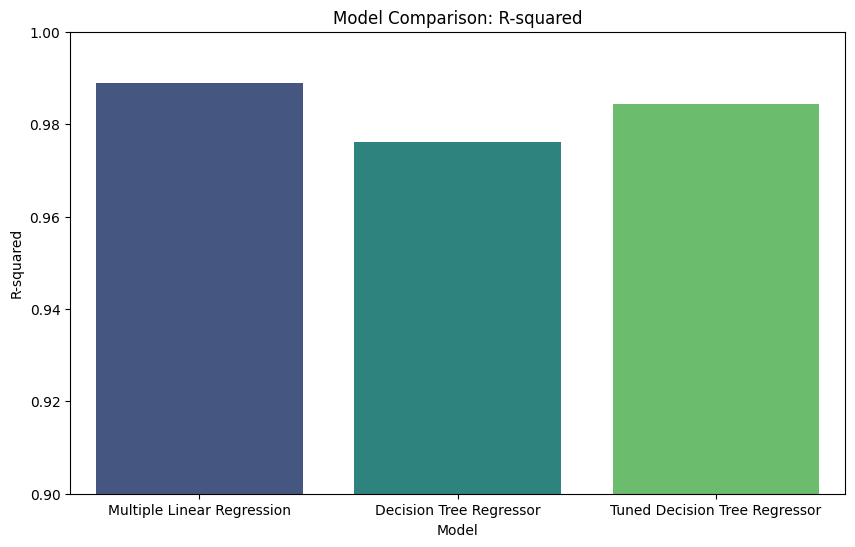

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R-squared', data=performance_df, palette='viridis')
plt.title('Model Comparison: R-squared')
plt.ylabel('R-squared')
plt.xlabel('Model')
plt.ylim(0.9, 1.0) # Set a relevant y-axis limit for R-squared
plt.show()

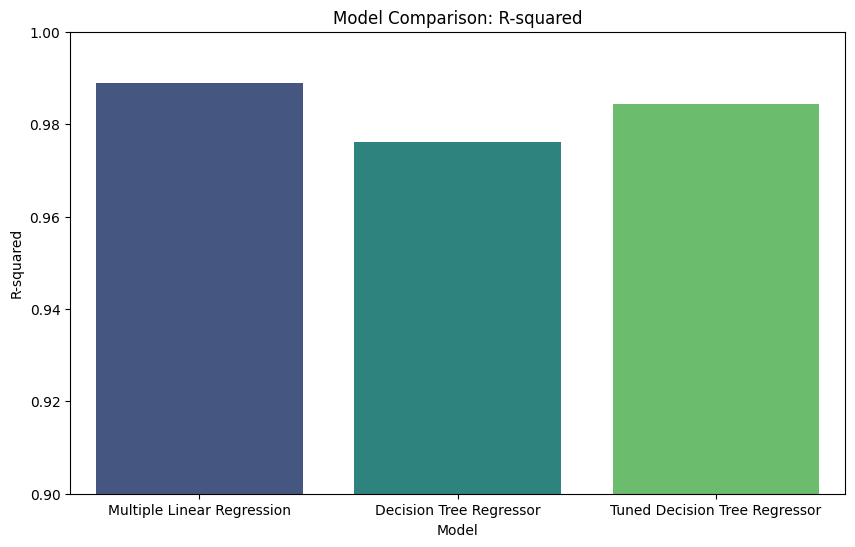

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R-squared', data=performance_df, palette='viridis', hue='Model', legend=False)
plt.title('Model Comparison: R-squared')
plt.ylabel('R-squared')
plt.xlabel('Model')
plt.ylim(0.9, 1.0) # Set a relevant y-axis limit for R-squared
plt.show()

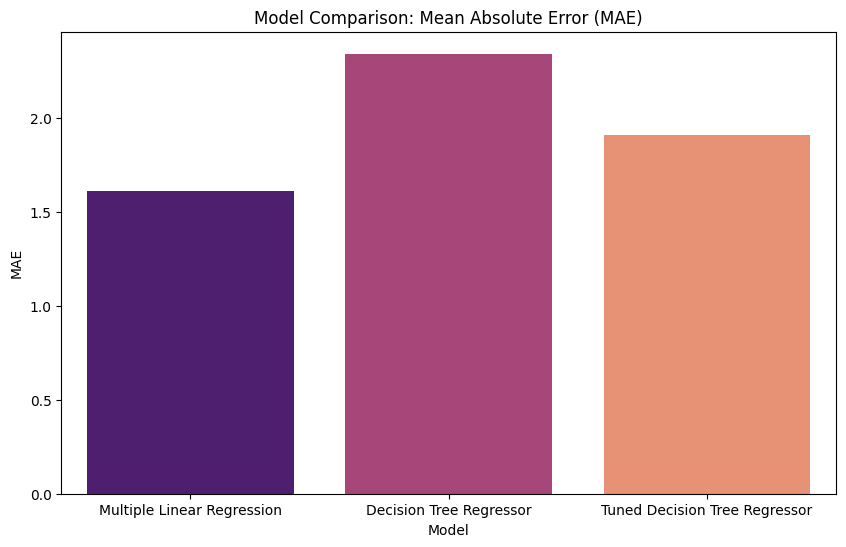

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MAE', data=performance_df, palette='magma', hue='Model', legend=False)
plt.title('Model Comparison: Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.xlabel('Model')
plt.show()

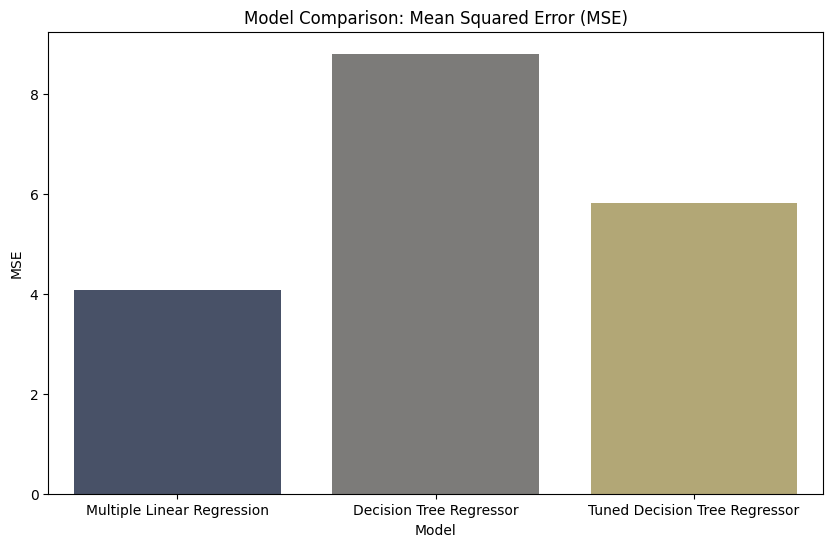

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', data=performance_df, palette='cividis', hue='Model', legend=False)
plt.title('Model Comparison: Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.xlabel('Model')
plt.show()

In [24]:
print('\n--- Model Performance Summary ---')
print(performance_df)

# Identify the best performing model based on R-squared (higher is better)
# and MAE/MSE (lower is better)
best_r2_model = performance_df.loc[performance_df['R-squared'].idxmax()]
best_mae_model = performance_df.loc[performance_df['MAE'].idxmin()]
best_mse_model = performance_df.loc[performance_df['MSE'].idxmin()]

print(f"\nBest R-squared Model: {best_r2_model['Model']} (R-squared: {best_r2_model['R-squared']:.4f})")
print(f"Best MAE Model: {best_mae_model['Model']} (MAE: {best_mae_model['MAE']:.4f})")
print(f"Best MSE Model: {best_mse_model['Model']} (MSE: {best_mse_model['MSE']:.4f})")

# Conclude the best model overall
# Given that R-squared is highest and MAE/MSE are lowest for Multiple Linear Regression,
# it appears to be the best performing model among the three.
print("\nBased on the comparison of R-squared, MAE, and MSE, the Multiple Linear Regression model is the best performing model for this dataset.")


--- Model Performance Summary ---
                           Model  R-squared       MAE       MSE
0     Multiple Linear Regression   0.988983  1.611121  4.082628
1        Decision Tree Regressor   0.976214  2.339083  8.814569
2  Tuned Decision Tree Regressor   0.984267  1.904565  5.830447

Best R-squared Model: Multiple Linear Regression (R-squared: 0.9890)
Best MAE Model: Multiple Linear Regression (MAE: 1.6111)
Best MSE Model: Multiple Linear Regression (MSE: 4.0826)

Based on the comparison of R-squared, MAE, and MSE, the Multiple Linear Regression model is the best performing model for this dataset.
